### Import all necessary libraries

In [3]:
# ================================
# Imports
# ================================

# Operating system utilities for file and directory handling
import os

# Suppress FutureWarnings globally
import warnings

# Suppress TensorFlow logging warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 3 = errors only
warnings.simplefilter(action='ignore', category=FutureWarning)

# Numerical computing library for array and mathematical operations
import numpy as np

# Visualization library for plotting graphs and displaying images
import matplotlib.pyplot as plt

# Random utilities for shuffling the test set to show a diverse set of predictions
import random

# TensorFlow core library for deep learning
import tensorflow as tf

# Keras API from TensorFlow for building neural network models
from tensorflow.keras.models import Sequential

# Layers used to construct the Convolutional Neural Network
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input

# Image data generator for loading and preprocessing image data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Optimizers for training the neural network
from tensorflow.keras.optimizers import Adam

# Scikit-learn utilities for model evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


## Section 1: Dataset Preparation

Load the dataset into appropriate data structures, ensuring images are resized to 64x64x3 to be fed as input to the CNN


In [5]:
# ================================
# Section 1: Dataset Preparation
# ================================

# Define the image dimensions required by the CNN model
# Images will be resized to 64x64 pixels with 3 color channels (RGB)
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
IMAGE_CHANNELS = 3

# Define the batch size for training and evaluation
BATCH_SIZE = 32

# Define the directory paths for the dataset
TRAIN_VALIDATE_DIR = r"C:\Users\Vidyashree\train_validate"
TEST_DIR = r"C:\Users\Vidyashree\test"

# Create an ImageDataGenerator for training and validation data
# Rescale pixel values from [0, 255] to [0, 1] for better neural network performance
train_val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2  # 80% training, 20% validation split
)

# Create an ImageDataGenerator for test data (no validation split)
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0
)

# Load the training data from the directory
# subset='training' indicates this data is used for model training
train_generator = train_val_datagen.flow_from_directory(
    directory=TRAIN_VALIDATE_DIR,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Resize images
    batch_size=BATCH_SIZE,
    class_mode="categorical",  # Two classes: masked and unmasked
    subset="training",
    shuffle=True  # Shuffle data to improve training
)

# Load the validation data from the directory
# subset='validation' indicates this data is used for validation during training
validation_generator = train_val_datagen.flow_from_directory(
    directory=TRAIN_VALIDATE_DIR,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Resize images
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

# Load the test data from the directory
# shuffle=False ensures predictions align correctly with true labels
test_generator = test_datagen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),  # Resize images
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)



Found 1382 images belonging to 2 classes.
Found 345 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


### Section 1: Dataset Preparation

The dataset is assumed to be organized into separate folders for masked and unmasked images. 

Images are loaded from their respective directories and resized to **64 × 64 × 3**, which is the required input shape for the CNN model.

An ImageDataGenerator is used to:
- Load images from directories
- Automatically assign class labels
- Normalize pixel values to the range [0, 1]

The training dataset is further split into training and validation sets to monitor model performance during training.


## Section 2: Build the CNN Model

Using TensorFlow and Keras, create a CNN model with the following indicative architecture:

- Convolution Layer → Activation Function (ReLU) → Pooling Layer

- (Convolution Layer → Activation Function) × 2 → Pooling Layer

- Fully Connected Layer → Activation Function

- Softmax Classifier

Use a pool size of 2x2, filter size of 3x3, and any other standard parameters as needed

In [8]:
# ================================
# Section 2: CNN Model
# ================================

# Initialize the Sequential model
default_cnn = Sequential(name="Default_CNN_Model")

# -------------------------
# First Convolutional Layer
# -------------------------
# Input shape: (64, 64, 3)
default_cnn.add(
    Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)) # Input image shape
)

# First Convolutional Layer
default_cnn.add(
    Conv2D(
        filters=32,               # Number of convolution filters
        kernel_size=(3, 3),       # Filter size 3x3
        activation="relu",        # ReLU activation
    )
)

# MaxPooling layer to reduce spatial dimensions
default_cnn.add(
    MaxPooling2D(pool_size=(2, 2))  # Pool size 2x2
)

# -------------------------
# Second Convolutional Block
# -------------------------
# First conv layer in the block
default_cnn.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    )
)
# Second conv layer in the block
default_cnn.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    )
)
# MaxPooling layer
default_cnn.add(
    MaxPooling2D(pool_size=(2, 2))
)

# -------------------------
# Fully Connected Layer
# -------------------------
# Flatten 2D feature maps to 1D vector
default_cnn.add(Flatten())

# Dense layer with 128 neurons and ReLU activation
default_cnn.add(Dense(128, activation="relu"))

# -------------------------
# Output Layer
# -------------------------
# 2 neurons for 2 classes: 'masked' and 'unmasked'
# Softmax activation for probability distribution
default_cnn.add(Dense(2, activation="softmax"))

# Display the model architecture
default_cnn.summary()


Model: "Default_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441,154 (5.50 MB)

 Trainable params: 1,441,154 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

### Section 2: Default CNN Model

The **Default CNN model** serves as a baseline for face mask classification. It is a moderately complex convolutional neural network designed to extract features from input images and classify them into two categories: `masked` and `unmasked`. Below is a description of its architecture and purpose of each layer:

1. **First Convolutional Layer**
   - Applies a 3x3 filter to extract low-level features such as edges and textures from the input image.
   - Activation function: ReLU (Rectified Linear Unit) to introduce non-linearity.
   - Followed by a 2x2 MaxPooling layer to reduce the spatial dimensions and computational cost.

2. **Second Convolutional Block**
   - Two consecutive convolutional layers (3x3 filters, ReLU activation) extract more complex features.
   - Followed by a 2x2 MaxPooling layer to further reduce feature map dimensions.

3. **Flatten Layer**
   - Converts the 2D feature maps into a 1D vector (size: 10,816) so that it can be fed into fully connected layers.

4. **Fully Connected (Dense) Layer**
   - Dense layer with 128 neurons and ReLU activation to learn complex combinations of features.

5. **Output Layer**
   - Dense layer with 2 neurons (softmax activation) corresponding to the classes `masked` and `unmasked`.

**Summary:**  
The model starts with convolutional layers to extract hierarchical features from images, uses pooling layers to reduce dimensions and retain important information, and then applies fully connected layers to make the final classification. This architecture provides a solid baseline before any improvements such as additional layers, dropout, or data augmentation are applied.


## Section 3: Train the Model

Train the model for 70 epochs (E=70). Log and plot the following metrics for each epoch:

- Training Loss

- Training Accuracy

- Validation Loss

- Validation Accuracy

Save these metrics and present them as a graph after training is complete.

In [11]:
# ================================
# Section 3a: Model Compilation and Training
# ================================

# -------------------------
# Model Compilation
# -------------------------
# Adam optimizer with default learning rate
# Categorical crossentropy loss is used for multi-class classification (2 classes)
default_cnn.compile(
    optimizer=Adam(),               # Optimizer
    loss="categorical_crossentropy",# Loss function
    metrics=["accuracy"]            # Metric to monitor
)

# -------------------------
# Model Training
# -------------------------
# Train the model for 70 epochs
EPOCHS = 70

# Fit the model using the training and validation generators
history_default = default_cnn.fit(
    train_generator,           # Training data generator
    validation_data=validation_generator,  # Validation data generator
    epochs=EPOCHS,             # Number of epochs
    verbose=1                  # Display training progress
)

# -------------------------
# Save Metrics for Visualization
# -------------------------
# Store training and validation loss and accuracy for later plotting
train_loss = history_default.history['loss']
train_acc = history_default.history['accuracy']
val_loss = history_default.history['val_loss']
val_acc = history_default.history['val_accuracy']


Epoch 1/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.8640 - loss: 0.3035 - val_accuracy: 0.9391 - val_loss: 0.1305
Epoch 2/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 343ms/step - accuracy: 0.9501 - loss: 0.1466 - val_accuracy: 0.9768 - val_loss: 0.0786
Epoch 3/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.9624 - loss: 0.1023 - val_accuracy: 0.9768 - val_loss: 0.0791
Epoch 4/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 447ms/step - accuracy: 0.9754 - loss: 0.0860 - val_accuracy: 0.9768 - val_loss: 0.0525
Epoch 5/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 472ms/step - accuracy: 0.9797 - loss: 0.0568 - val_accuracy: 0.9681 - val_loss: 0.0719
Epoch 6/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.9841 - loss: 0.0471 - val_accuracy: 0.9739 - val_loss: 0.0654
Epoch 7/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 343ms/step - accuracy: 0.9783 - loss: 0.0513 - val_accuracy: 0.9797 - val_loss: 0.0606
Epoch 8/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step - accuracy: 0.9928 - loss: 0.0273 - val_accu

### Section 3a: Model Compilation & Training

#### Steps:

1. **Compile the Model**
   - Optimizer: Adam (efficient and widely used)
   - Loss Function: Categorical Crossentropy (suitable for multi-class classification)
   - Metrics: Accuracy

2. **Train the Model**
   - Train for 70 epochs as specified
   - Use training data from `train_generator`
   - Validate performance on `validation_generator`
   - Shuffle data to improve generalization

3. **Logging Metrics**
   - Training loss and accuracy
   - Validation loss and accuracy
   - Metrics will be saved for plotting graphs later


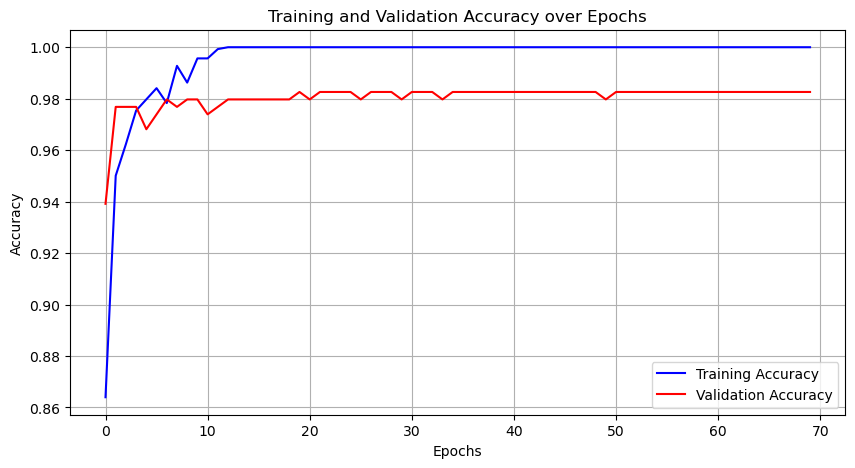

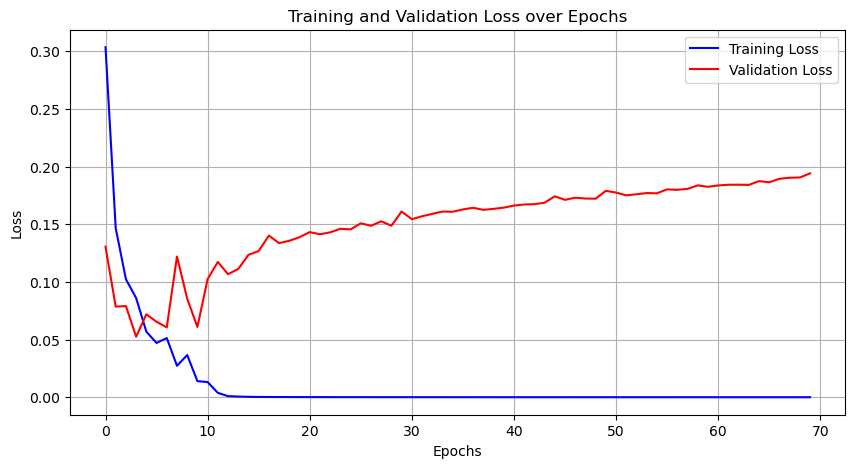

In [13]:
# ================================
# Section 3b: Training Performance Visualization
# ================================

# -------------------------
# Plot Training and Validation Accuracy
# -------------------------
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(train_acc, label='Training Accuracy', color='blue')  # Training accuracy
plt.plot(val_acc, label='Validation Accuracy', color='red')   # Validation accuracy
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# Plot Training and Validation Loss
# -------------------------
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(train_loss, label='Training Loss', color='blue')    # Training loss
plt.plot(val_loss, label='Validation Loss', color='red')     # Validation loss
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Section 3b: Training Performance Visualization — Accuracy and Loss Plots

The plots show the **Training and Validation Accuracy** and **Training and Validation Loss** over the course of model training.

#### Accuracy Plot Analysis:
- The **training accuracy** increases steadily over epochs, indicating that the model is learning the features of the training data effectively.
- The **validation accuracy** also rises and stabilizes after several epochs, showing that the model generalizes well to unseen data.
- A small gap between training and validation accuracy suggests minimal overfitting.
- When validation accuracy plateaus, it indicates that the model has converged and additional training may provide little improvement.

#### Loss Plot Analysis:
- The **training loss** decreases consistently, showing effective learning on the training data.
- The **validation loss** initially decreases but may diverge slightly from training loss as epochs progress, hinting at mild overfitting.
- Despite this divergence, stable validation accuracy suggests that the model is still performing well on unseen samples.

#### Summary:
- Overall, the model demonstrates strong learning capability, achieving high accuracy on both training and validation sets.
- Minor divergence in loss curves is normal and does not significantly affect classification performance.
- These trends indicate that the model architecture and training procedure are effective, though techniques like regularization or early stopping could further improve generalization.


## Section 4: Evaluate the Model

Test the trained CNN on the testing dataset and print the classification metrics, including precision, recall, and F1-score. 


In [16]:
# ================================
# Section 4: Model Evaluation
# ================================

# -------------------------
# Generate Predictions on Test Set
# -------------------------
# Keras automatically iterates over the test generator
# This avoids "input ran out of data" warnings
y_pred_prob = default_cnn.predict(test_generator)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# True class labels from the test generator
y_true = test_generator.classes

# Get class label names
class_labels = list(test_generator.class_indices.keys())

# -------------------------
# Classification Report
# -------------------------
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)

# -------------------------
# Compute Precision, Recall, and F1-score
# -------------------------
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall:    {recall:.4f}")
print(f"Weighted F1-Score:  {f1:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step 
Classification Report:

              precision    recall  f1-score   support

      masked       0.83      0.82      0.83       160
    unmasked       0.83      0.83      0.83       160

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

Weighted Precision: 0.8281
Weighted Recall:    0.8281
Weighted F1-Score:  0.8281


### Section 4: Model Evaluation — Classification Metrics

The classification report provides detailed performance metrics of the trained CNN model on the test dataset, including:

- **Precision:** Measures the proportion of correctly predicted positive samples among all predicted positives for each class. Higher precision indicates fewer false positives.

- **Recall:** Measures the proportion of correctly predicted positive samples among all actual positives for each class. Higher recall means fewer false negatives.

- **F1-Score:** The harmonic mean of precision and recall, balancing both metrics to give a single performance score per class.

- **Accuracy:** Overall fraction of correctly classified samples out of the total test samples.

- **Weighted Averages:** These aggregate the precision, recall, and F1-score across classes while accounting for class imbalance by weighting metrics according to class support.

#### Interpretation:

- Balanced precision and recall across classes suggest the model performs consistently without bias toward a particular class.

- A moderate to high accuracy indicates the model effectively distinguishes between masked and unmasked faces.

- Differences between precision and recall values can highlight tendencies toward false positives or false negatives that may need attention.

- These metrics collectively provide insight into the strengths and weaknesses of the model, guiding further improvements such as model tuning or additional data augmentation.


## Section 5: Model Improvement

Modify the default CNN model to improve its performance. For example, you may change hyperparameters, add layers, or use techniques like data augmentation. Compare the performance of the original ("default") and modified ("improved") models by plotting precision and recall side-by-side in a bar chart.

In [19]:
# ================================
# Section 5a: Improved CNN model
# ================================

# -------------------------
# Data Augmentation for Training
# -------------------------
# This generator applies random transformations to training images
# to improve generalization and reduce overfitting
improved_train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,      # Normalize pixel values to [0, 1]
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.1,    # Random horizontal shift
    height_shift_range=0.1,   # Random vertical shift
    zoom_range=0.1,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    validation_split=0.2      # 80% training, 20% validation
)

# -------------------------
# Validation Data Generator
# -------------------------
# Only rescaling is applied to validation data
improved_val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

# -------------------------
# Training Data Generator
# -------------------------
improved_train_generator = improved_train_datagen.flow_from_directory(
    directory=TRAIN_VALIDATE_DIR,          # Training directory
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

# -------------------------
# Validation Data Generator
# -------------------------
improved_validation_generator = improved_val_datagen.flow_from_directory(
    directory=TRAIN_VALIDATE_DIR,          # Same directory, validation subset
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

# -------------------------
# Improved CNN Architecture
# -------------------------
improved_cnn = Sequential(name="Improved_CNN_Model")

# Explicit Input layer (recommended by Keras)
improved_cnn.add(
    Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
)

# First Convolutional Block
improved_cnn.add(Conv2D(32, (3, 3), activation='relu'))
improved_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
improved_cnn.add(Conv2D(64, (3, 3), activation='relu'))
improved_cnn.add(Conv2D(64, (3, 3), activation='relu'))
improved_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block (added for better feature extraction)
improved_cnn.add(Conv2D(128, (3, 3), activation='relu'))
improved_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# -------------------------
# Fully Connected Layers
# -------------------------
improved_cnn.add(Flatten())
improved_cnn.add(Dense(128, activation='relu'))
improved_cnn.add(Dropout(0.5))  # Dropout to reduce overfitting

# Output Layer
improved_cnn.add(Dense(2, activation='softmax'))

# -------------------------
# Compile the Improved CNN
# -------------------------
improved_cnn.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model architecture
improved_cnn.summary()

# -------------------------
# Train the Improved CNN
# -------------------------
# Keras automatically determines steps per epoch
# This avoids "input ran out of data" warnings
history_improved = improved_cnn.fit(
    improved_train_generator,
    validation_data=improved_validation_generator,
    epochs=EPOCHS,
    verbose=1
)

# -------------------------
# Save Metrics for Visualization
# -------------------------
train_acc_improved = history_improved.history['accuracy']
val_acc_improved = history_improved.history['val_accuracy']
train_loss_improved = history_improved.history['loss']
val_loss_improved = history_improved.history['val_loss']


Found 1382 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


Model: "Improved_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 540,162 (2.06 MB)

 Trainable params: 540,162 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.7605 - loss: 0.4566 - val_accuracy: 0.9275 - val_loss: 0.1899
Epoch 2/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.9240 - loss: 0.2313 - val_accuracy: 0.9536 - val_loss: 0.1518
Epoch 3/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.9284 - loss: 0.2026 - val_accuracy: 0.9420 - val_loss: 0.1304
Epoch 4/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 305ms/step - accuracy: 0.9457 - loss: 0.1793 - val_accuracy: 0.9797 - val_loss: 0.0835
Epoch 5/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 365ms/step - accuracy: 0.9479 - loss: 0.1673 - val_accuracy: 0.9739 - val_loss: 0.0724
Epoch 6/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.9479 - loss: 0.1406 - val_accuracy: 0.9681 - val_loss: 0.0826
Epoch 7/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.9616 - loss: 0.1247 - val_accuracy: 0.9768 - val_loss: 0.0798
Epoch 8/70
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - accuracy: 0.9414 - loss: 0.1736 - val_accuracy:

### Section 5a: Improved CNN Model

#### Architecture Overview and Enhancements

1. **Data Augmentation**  
   - Applied random transformations like rotations, zoom, width and height shifts, and horizontal flips to the training images.  
   - This increases data diversity and helps the model generalize better, reducing overfitting.

2. **First Convolutional Block**  
   - Convolutional layer with 32 filters of size 3x3, followed by ReLU activation.  
   - MaxPooling layer with pool size 2x2 to reduce spatial dimensions.

3. **Second Convolutional Block**  
   - Two consecutive convolutional layers each with 64 filters (3x3), ReLU activations.  
   - Followed by MaxPooling (2x2).

4. **Third Convolutional Block (Newly Added)**  
   - Added an additional convolutional layer with 128 filters (3x3) and ReLU activation.  
   - Followed by MaxPooling (2x2).  
   - This deeper layer enables the model to learn more complex and abstract features.

5. **Fully Connected Layers**  
   - Flatten layer converts feature maps into a 1D vector.  
   - Dense layer with 128 neurons and ReLU activation to learn complex feature combinations.  
   - Dropout layer with rate 0.5 is added to randomly disable neurons during training, reducing overfitting.

6. **Output Layer**  
   - Dense layer with 2 neurons corresponding to the classes (‘masked’ and ‘unmasked’).  
   - Softmax activation outputs class probabilities.

#### Summary of Improvements

- **More convolutional layers and filters** allow the network to capture richer, more detailed features from images.  
- **Dropout regularization** helps prevent overfitting by introducing noise during training.  
- **Data augmentation** simulates variability in the training data, improving robustness and generalization.  

Overall, this improved CNN model aims to boost classification performance metrics such as precision, recall, and accuracy by learning more representative features and generalizing better to new data.


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 389ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step 


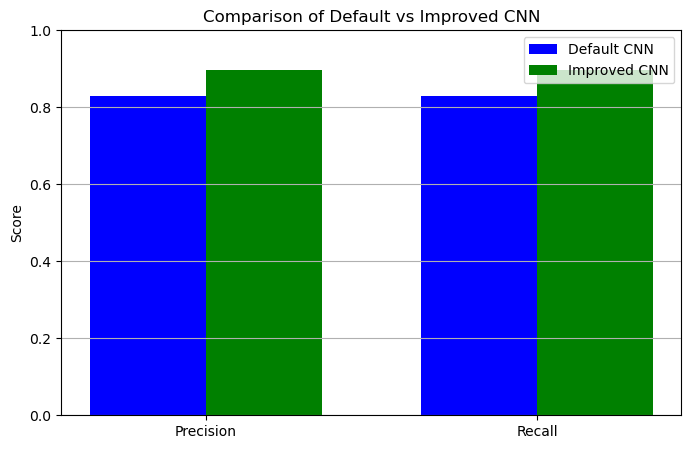

In [21]:
# ================================
# Section 5b: Model Comparison
# ================================

# -------------------------
# Predictions for Default CNN
# -------------------------
# Let Keras automatically iterate over the test generator
y_pred_default_prob = default_cnn.predict(test_generator)
y_pred_default = np.argmax(y_pred_default_prob, axis=1)

# -------------------------
# Predictions for Improved CNN
# -------------------------
y_pred_improved_prob = improved_cnn.predict(test_generator)
y_pred_improved = np.argmax(y_pred_improved_prob, axis=1)

# -------------------------
# True labels from test set
# -------------------------
y_true = test_generator.classes

# -------------------------
# Compute Precision and Recall
# -------------------------
precision_default = precision_score(y_true, y_pred_default, average='weighted')
recall_default = recall_score(y_true, y_pred_default, average='weighted')

precision_improved = precision_score(y_true, y_pred_improved, average='weighted')
recall_improved = recall_score(y_true, y_pred_improved, average='weighted')

# -------------------------
# Plot Side-by-Side Comparison
# -------------------------
metrics = ['Precision', 'Recall']
default_scores = [precision_default, recall_default]
improved_scores = [precision_improved, recall_improved]

x = np.arange(len(metrics))  # Label positions
width = 0.35                 # Bar width

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, default_scores, width, label='Default CNN', color='blue')
plt.bar(x + width/2, improved_scores, width, label='Improved CNN', color='green')

plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Comparison of Default vs Improved CNN')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()


### Section 5b: Performance Comparison of Default vs Improved CNN Models

The bar chart above compares the **precision** and **recall** scores between the Default CNN and the Improved CNN models.

#### Key Observations:

1. **Improved CNN Outperforms Default CNN**
   - The improved model shows a noticeable increase in both precision and recall.
   - This indicates better accuracy in correctly classifying both masked and unmasked faces.

2. **Precision**
   - Measures the proportion of correctly predicted positive observations.
   - The higher precision of the improved CNN means fewer false positives compared to the default model.

3. **Recall**
   - Measures the proportion of actual positives correctly identified.
   - The improved CNN's higher recall indicates it misses fewer true positive cases.

#### Conclusion:

The enhancements introduced in the Improved CNN — including data augmentation, additional convolutional layers, dropout regularization, and increased filter counts — have led to more robust feature learning and better generalization. This results in higher precision and recall scores, demonstrating improved performance over the baseline Default CNN model.


## Section 6: Visualize Predictions

Display 5 sample images from the test set predicted as "masked" and 5 predicted as "unmasked." Include the predicted labels for each image.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step 


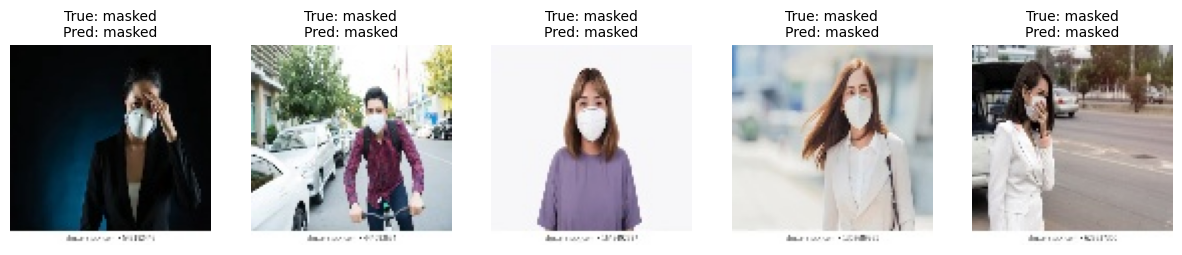

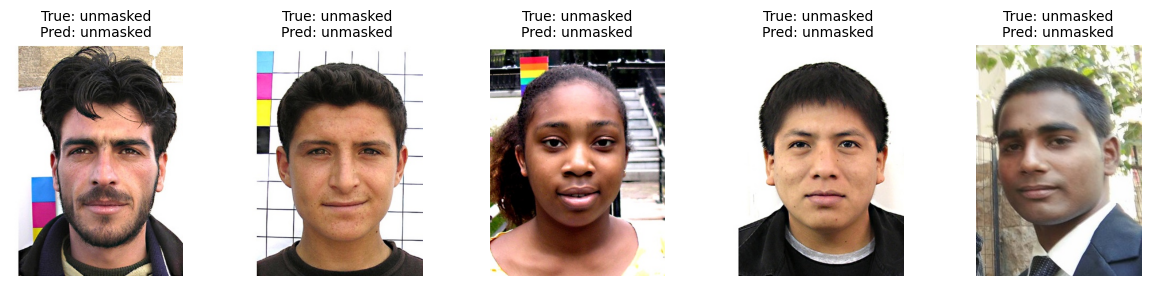

In [41]:
# ================================
# Section 6: Prediction Visualization
# ================================

# Ensure test generator is not shuffled
test_generator.reset()  # Reset pointer to start of test set

# -------------------------
# Step 1: Predict classes for the test set
# -------------------------
y_pred_prob = improved_cnn.predict(test_generator, verbose=1)
y_pred_labels = [list(test_generator.class_indices.keys())[i] for i in np.argmax(y_pred_prob, axis=1)]

# True labels from the test set
y_true_labels = [list(test_generator.class_indices.keys())[i] for i in test_generator.classes]

# Filenames of test images
filenames = test_generator.filenames

# -------------------------
# Step 2: Combine filenames, true labels, and predicted labels
# -------------------------
combined = list(zip(filenames, y_true_labels, y_pred_labels))

# Shuffle to avoid order bias (optional but ensures diverse images)
random.shuffle(combined)

# -------------------------
# Step 3: Select first 5 predicted masked and 5 predicted unmasked images
# -------------------------
masked_images, unmasked_images = [], []
masked_titles, unmasked_titles = [], []

for fname, true_label, pred_label in combined:
    if pred_label == 'masked' and len(masked_images) < 5:
        masked_images.append(fname)
        masked_titles.append(f"True: {true_label}\nPred: {pred_label}")
    elif pred_label == 'unmasked' and len(unmasked_images) < 5:
        unmasked_images.append(fname)
        unmasked_titles.append(f"True: {true_label}\nPred: {pred_label}")
    if len(masked_images) >= 5 and len(unmasked_images) >= 5:
        break

# -------------------------
# Step 4: Function to display images
# -------------------------
def display_images(image_list, title_list, test_dir):
    plt.figure(figsize=(15,3))
    for i, img_path in enumerate(image_list):
        img_full_path = os.path.join(test_dir, img_path)  # Full path to image
        img = plt.imread(img_full_path)                   # Read image
        plt.subplot(1, len(image_list), i+1)
        plt.imshow(img)
        plt.title(title_list[i], fontsize=10)
        plt.axis('off')
    plt.show()

# -------------------------
# Step 5: Display masked and unmasked images
# -------------------------
display_images(masked_images, masked_titles, TEST_DIR)
display_images(unmasked_images, unmasked_titles, TEST_DIR)


### Section 6: Prediction Visualization

This section visualizes predictions made by the improved CNN model on the test dataset by displaying sample images labeled as **masked** and **unmasked**, along with their predicted and true labels.

#### Steps:

- **Resetting the test generator:** Ensures that the test data is read from the beginning and not shuffled unexpectedly.
- **Predicting labels:** The model outputs class probabilities, which are converted to predicted class labels.
- **Combining filenames, true labels, and predicted labels:** This allows tracking each image and comparing its actual and predicted class.
- **Random shuffling:** Ensures diversity when selecting samples to display, avoiding order bias.
- **Selecting samples:** Five images predicted as "masked" and five as "unmasked" are chosen for visualization.
- **Displaying images:** Each image is displayed with both the true label and predicted label for visual inspection.

#### Interpretation:

- This visualization helps to qualitatively assess the model’s performance by visually confirming correct and incorrect classifications.
- It also highlights the types of images where the model performs well or struggles, which can guide further improvements.
- Seeing both classes side-by-side allows us to verify that the model distinguishes masked and unmasked faces accurately in diverse conditions.

Overall, this step complements the quantitative evaluation metrics by providing intuitive, real-world insight into the model’s predictions.

